# 타이타닉호 생존자 예측

- RMS 타이타닉 호(이하 타이타닉 호)는 1912년 4월 15일 빙산과 충돌하여 침몰한 북대서양 횡단 여객선이다.

- 타이타닉 호에 탑승했던 승객들의 승객번호, 선실등급, 이름, 성별, 나이, 배우자, 형제자매, 부모, 자녀 수, 티켓번호, 운임요금, 선실명, 승선장 정보가 원인변수, 생존여부가 결과변수로 들어있는 데이터프레임을 다양한 기계학습 기법(KNN, 로지스틱회귀분석, 나이브베이즈, SVM, 의사결정나무, 랜덤포레스트)을 이용해 생존여부를 예측 모델을 구축하고자 한다.

## 3. 기계학습

### 1. 모듈 장착

In [1]:
# basic module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklaern module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Ipython image module
from IPython.display import Image

### 2. 데이터 불러오기

In [2]:
file_path = 'C:/Users/ssmoo/Desktop/kaggle_titanic_prediction/data/refined_data/'
train_X = pd.read_csv(file_path + 'train_X.csv')
train_y = pd.read_csv(file_path + 'train_y.csv')
test_X = pd.read_csv(file_path + 'test_X.csv')

### 3. 학습 데이터, 테스트 데이터 분할

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train_X.values, train_y.values, random_state = 0)

In [4]:
X_train.shape

(666, 23)

In [5]:
X_test.shape

(223, 23)

In [6]:
y_train.shape

(666, 1)

In [7]:
y_test.shape

(223, 1)

In [8]:
y_train, y_test = y_train.ravel(), y_test.ravel()

### 4. 머신러닝 모델별 학습

#### 1. KNN

In [9]:
n_neighbors_list = np.arange(1, 101)
n_neighbors_train_score_list = []
n_neighbors_test_score_list = []

for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    n_neighbors_train_score_list.append(knn.score(X_train, y_train))
    n_neighbors_test_score_list.append(knn.score(X_test, y_test))

diff_train_test_list = np.array(n_neighbors_train_score_list) - np.array(n_neighbors_test_score_list)
np.argmin(diff_train_test_list)

35

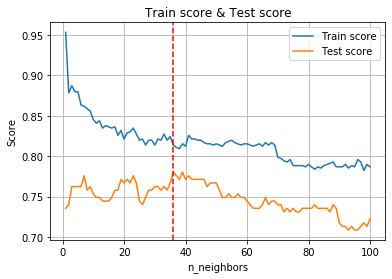

In [10]:
plt.plot(n_neighbors_list, n_neighbors_train_score_list, label = 'Train score')
plt.plot(n_neighbors_list, n_neighbors_test_score_list, label = 'Test score')
plt.axvline(x = 36, color = 'red', ls = '--')
plt.title('Train score & Test score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

- 매개변수 n_neighbors가 작을수록 과대적합, 클수록 과소적합 된다.
- train score과 test score의 차이가 가장 적은 곳은 35번 째 데이터로 매개변수 n이 36일 때 가장 적합한 것으로 판단된다.

In [11]:
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7802690582959642

- 매개변수 n_neighbors를 36으로 train set을 적합시켰을 때 test set의 예측 스코어는 약 0.78이다.

#### 2. 나이브 베이즈

In [12]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7443946188340808

- 나이브베이즈 모델의 예측 스코어는 약 0.74이다.

#### 3. 로지스틱 회귀

In [13]:
C_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
C_train_score_list = []
C_test_score_list = []

for C in C_list:
    lr = LogisticRegression(C = C)
    lr.fit(X_train, y_train)
    C_train_score_list.append(lr.score(X_train, y_train))
    C_test_score_list.append(lr.score(X_test, y_test)) # 0.1 에서 가장 높음


C:\Users\ssmoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ssmoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ssmoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ssmoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ssmoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

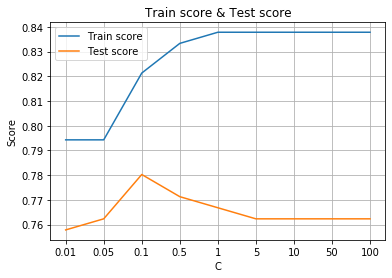

In [14]:
C_list_str = list(map(str, C_list))

plt.plot(C_list_str, C_train_score_list, label = 'Train score')
plt.plot(C_list_str, C_test_score_list, label = 'Test score')
plt.title('Train score & Test score')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

- 매개변수 C값이 작을수록 과소적합, 클수록 과대적합된다.
- 로지스틱 회귀 모델에서 매개변수 C값이 0.1일때 가장 예측력이 좋았으며 이때 test set의 예측 스코어는 약 0.78이다.

#### 4. SVM

In [15]:
C_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
gamma_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
C_gamma_matrix = np.zeros([9, 9])

for j in range(len(gamma_list)):
    
    for i in range(len(C_list)):
        svm = SVC(C = C_list[i], gamma = gamma_list[j])
        svm.fit(X_train, y_train)
        C_gamma_matrix[i, j] = svm.score(X_test, y_test)


C_gamma_df = pd.DataFrame(C_gamma_matrix)
C_gamma_df.index = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
C_gamma_df.columns = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

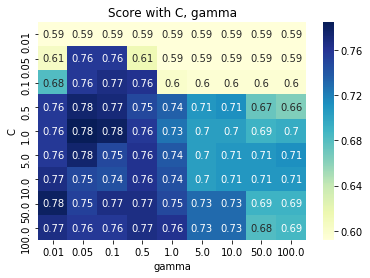

In [16]:
sns.heatmap(C_gamma_df, annot=True, cmap='YlGnBu')
plt.title('Score with C, gamma')
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()

In [17]:
# C = 1, gamma = 0.05
svm = SVC(C = 1, gamma = 0.05)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7847533632286996

- SVM은 매개변수가 C와 gamma 두가지이므로 히트맵을 그려 적절한 매개변수를 찾는다.
- 매개변수 C : 1.0, gamma : 0.05에서 test set에 대한 예측스코어가 약 0.78로 가장 좋다.

#### 5. 의사결정나무

In [19]:
max_depth_list = np.arange(1, 101)
max_depth_train_score_list = []
max_depth_test_score_list = []

for max_depth in max_depth_list:
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt.fit(X_train, y_train)
    max_depth_train_score_list.append(dt.score(X_train, y_train))
    max_depth_test_score_list.append(dt.score(X_test, y_test))
  
max_depth_list[np.argmax(max_depth_test_score_list)]

10

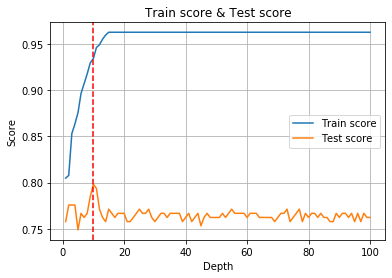

In [20]:
plt.plot(max_depth_list, max_depth_train_score_list, label = 'Train score')
plt.plot(max_depth_list, max_depth_test_score_list, label = 'Test score')
plt.axvline(10, c = 'red', ls = '--')
plt.title('Train score & Test score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

In [21]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7937219730941704

- 매개변수 max_depth 값은 10에서 예측력이 좋았으며 test set에 대한 점수는 약 0.79가 나왔다.
- 의사결정나무가 여러 지도학습 모델 중 가장 높은 예측력을 보였다.

#### 6. 랜덤 포레스트

In [22]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7623318385650224

- n_estimators를 100으로 설정한 결과 예측스코어는 0.76이 나왔다.

#### 7. 앙상블 분류기

- 위의 6가지 모델을 기반으로 앙상블 분류기를 만든다.
- 생존, 사망에 대한 예측 비율이 5:5가 나올 경우 사망으로 분류한다.

##### train set

In [23]:
def get_ensemble_pred(knn_pred, nb_pred, lr_pred, svm_pred, dt_pred, rf_pred):
    tmp_pred = knn_pred + nb_pred + lr_pred + svm_pred + dt_pred + rf_pred
    tmp_pred = (tmp_pred / 5) > 0.5
    
    return tmp_pred.astype(int)
    
knn_pred = knn.predict(X_train)
nb_pred = nb.predict(X_train)
lr_pred = lr.predict(X_train)
svm_pred = svm.predict(X_train)
dt_pred = dt.predict(X_train)
rf_pred = rf.predict(X_train)

ensemble_pred = get_ensemble_pred(knn_pred, nb_pred, lr_pred, svm_pred, dt_pred, rf_pred)

print(np.sum(ensemble_pred == y_train.flatten()) / len(X_train))

0.8648648648648649


##### test set

In [24]:
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

ensemble_pred = get_ensemble_pred(knn_pred, nb_pred, lr_pred, svm_pred, dt_pred, rf_pred)

print(np.sum(ensemble_pred == y_test.flatten()) / len(X_test))

0.7713004484304933


- train set에 대한 예측 스코어는 약 0.86, test set에 대한 예측스코어는 약 0.77이다.

### 5. 예측 데이터 저장 및 제출

In [26]:
PassengerId = np.arange(892,892 + 418)

# knn
Survived = knn.predict(test_X)
knn_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
knn_pred.to_csv('knn_pred.csv', index = False)

# naive bayes
Survived = nb.predict(test_X)
nb_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
nb_pred.to_csv('nb_pred.csv', index = False)

# logistic regression
Survived = lr.predict(test_X)
lr_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
lr_pred.to_csv('lr_pred.csv', index = False)

# svm
Survived = svm.predict(test_X)
svm_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
svm_pred.to_csv('svm_pred.csv', index = False)

# decision tree
Survived = dt.predict(test_X)
dt_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
dt_pred.to_csv('dt_pred.csv', index = False)

# random forest
Survived = rf.predict(test_X)
rf_pred = pd.DataFrame({'PassengerId' : PassengerId,
                         'Survived' : Survived})
rf_pred.to_csv('rf_pred.csv', index = False)

# ensemble
knn_pred = knn.predict(test_X)
nb_pred = nb.predict(test_X)
lr_pred = lr.predict(test_X)
svm_pred = svm.predict(test_X)
dt_pred = dt.predict(test_X)
rf_pred = rf.predict(test_X)

Survived = get_ensemble_pred(knn_pred, nb_pred, lr_pred, svm_pred, dt_pred, rf_pred)
ensemble_pred = pd.DataFrame({'PassengerId' : PassengerId,
                              'Survived' : Survived})
ensemble_pred.to_csv('ensemble_pred.csv', index = False)

- 위의 7가지 학습모델을 이용해 kaggle에서 첨부한 test.csv의 Survived(생존여부) 변수를 예측하고 예측 결과 데이터를 저장한다.

### 6. 결과

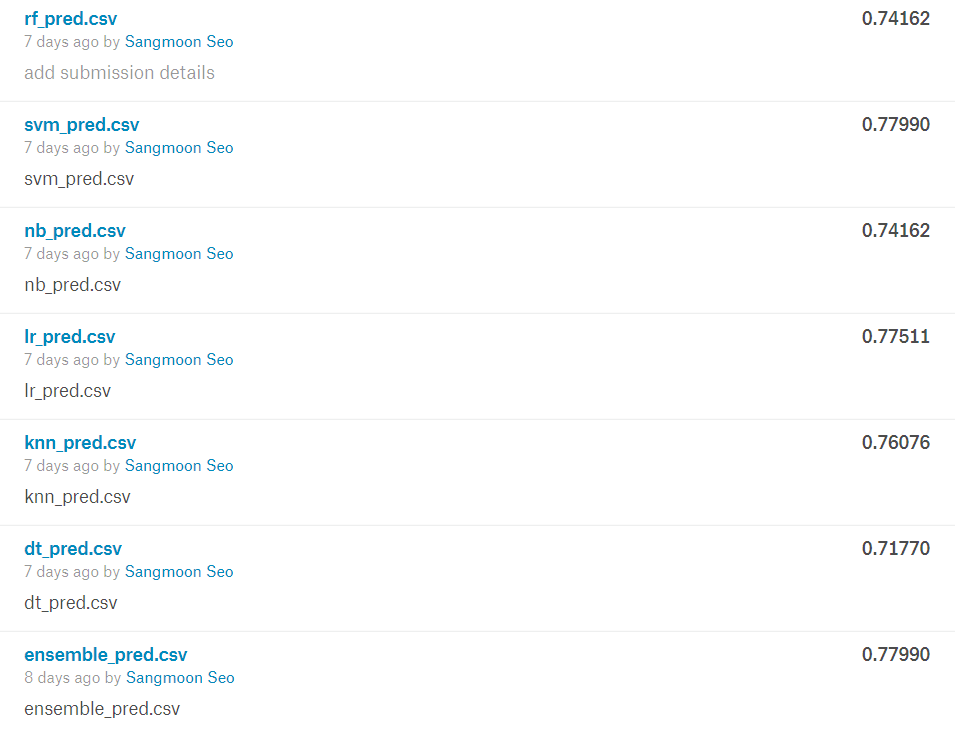

In [27]:
Image('C:/Users/ssmoo/Desktop/pred_score.png')

- 예측 스코어가 좋은 모델 부터 나열하면

모델 | 점수
-----|------
앙상블분류기 | 0.77990
SVM | 0.77990
로지스틱 회귀 | 0.77511
KNN | 0.76076
나이브베이즈 | 0.74162
랜덤포레스트 | 0.74162
의사결정나무 | 0.71770

- 위와 같이 나타난다.